In [1]:
#As a first step we will import the important libraries. then upload our data to start explore it 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv("Airline Passenger Satisfaction Data.csv")

In [3]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115004,42389,Male,Loyal Customer,17,Personal Travel,Eco,838.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,4.0,0.0,0.0,neutral or dissatisfied
115005,50040,Male,disloyal Customer,55,Business travel,Eco,86.0,2.0,3.0,2.0,4.0,1.0,2.0,1.0,1.0,4.0,2.0,4.0,3.0,3.0,1.0,0.0,1.0,neutral or dissatisfied
115006,90432,Female,Loyal Customer,57,Business travel,Business,406.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0.0,0.0,satisfied
115007,51844,Female,Loyal Customer,10,Personal Travel,Eco Plus,451.0,4.0,3.0,4.0,3.0,3.0,4.0,2.0,3.0,5.0,1.0,2.0,1.0,4.0,3.0,0.0,0.0,neutral or dissatisfied


In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115009 entries, 0 to 115008
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 115009 non-null  int64  
 1   Gender                             115009 non-null  object 
 2   Customer Type                      115009 non-null  object 
 3   Age                                115009 non-null  int64  
 4   Type of Travel                     115009 non-null  object 
 5   Class                              115009 non-null  object 
 6   Flight Distance                    115008 non-null  float64
 7   Inflight wifi service              115008 non-null  float64
 8   Departure/Arrival time convenient  115008 non-null  float64
 9   Ease of Online booking             115008 non-null  float64
 10  Gate location                      115008 non-null  float64
 11  Food and drink                     1150

In [ ]:
df.shape

(129880, 24)

In [6]:
# we can see that we have missing values in the "Arrival Delay in Minutes". Let's check their count
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        1
Inflight wifi service                  1
Departure/Arrival time convenient      1
Ease of Online booking                 1
Gate location                          1
Food and drink                         1
Online boarding                        1
Seat comfort                           1
Inflight entertainment                 1
On-board service                       1
Leg room service                       1
Baggage handling                       1
Checkin service                        1
Inflight service                       1
Cleanliness                            1
Departure Delay in Minutes             1
Arrival Delay in Minutes             354
satisfaction                           1
dtype: int64

In [ ]:
(df['Arrival Delay in Minutes'].isnull().sum())/(len(df.index))

0.003025870033877425

In [30]:
# we can see that it represent a small percentage of the whole data hence it will be better to drop the rows with that missing values.Also we will drop the feature "id" since it will not affect the result
df = df.dropna()
df = df.drop('id',axis=1)
df.shape

(129487, 23)

In [31]:
# now let's adjust the features name to check their unique values.
df.rename (columns= {
    'Customer Type' : 'Customer_Type',
    'Type of Travel': 'Type_of_Travel'    
}, inplace = True)

In [9]:
print (df.Gender.unique())
print (df.Customer_Type.unique())
print (df.Type_of_Travel.unique())
print (df.Class.unique())
print (df.satisfaction.unique())

# as we can see all the values are cleaned 

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Eco' 'Business' 'Eco Plus']
['satisfied' 'neutral or dissatisfied']


In [ ]:
df.duplicated().any() 
#no duplicates records in the data

False

In [ ]:
# Let's check the outliers !
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Online boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Seat comfort,129487.0,3.441589,1.319168,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129487.0,3.358067,1.334149,0.0,2.0,4.0,4.0,5.0


<AxesSubplot:xlabel='Departure Delay in Minutes'>

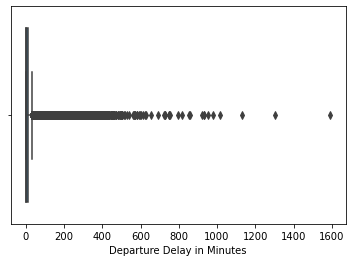

In [ ]:
# we can see that the the max of "Departure Delay in Minutes" and "Arrival Delay in Minutes" look to be large comparing with their mean so they will be maybe outliers . Let's see the box plot of them
sns.boxplot(x=df['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

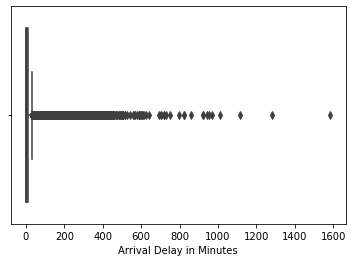

In [ ]:
sns.boxplot(x=df['Arrival Delay in Minutes'])

In [ ]:
df.loc[df['Departure Delay in Minutes'] > 1100]

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
17429,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,2,2,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied
32720,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
109717,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [32]:
# we can see that they have an extremely large values,since we have a large data we prefere to drop them
df.drop(df[df['Departure Delay in Minutes'] > 1100].index,inplace=True)
df.shape

(129484, 23)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129484.0,39.429003,15.117491,7.0,27.0,40.0,51.0,85.0
Flight Distance,129484.0,1190.198233,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129484.0,2.728561,1.329246,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129484.0,3.057351,1.526790,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129484.0,2.756804,1.401673,0.0,2.0,3.0,4.0,5.0
Gate location,129484.0,2.976924,1.278515,0.0,2.0,3.0,4.0,5.0
Food and drink,129484.0,3.204689,1.329903,0.0,2.0,3.0,4.0,5.0
Online boarding,129484.0,3.252718,1.350642,0.0,2.0,3.0,4.0,5.0
Seat comfort,129484.0,3.441607,1.319152,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129484.0,3.358075,1.334158,0.0,2.0,4.0,4.0,5.0


<AxesSubplot:xlabel='Departure Delay in Minutes'>

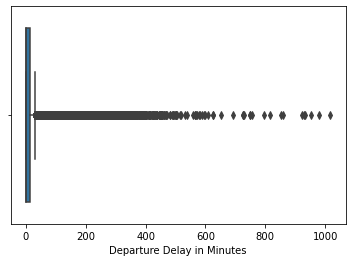

In [ ]:
sns.boxplot(x=df['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

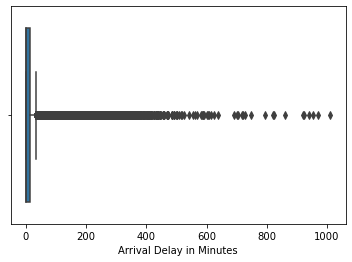

In [ ]:
sns.boxplot(x=df['Arrival Delay in Minutes'])

In [17]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [33]:
X = df.drop('satisfaction', axis = 1)

In [34]:
df['satisfaction'] = df.satisfaction.map({'satisfied' :1, 'neutral or dissatisfied' : 0})

In [35]:
y = df['satisfaction']

In [44]:
# now let'start to prepare the data for the prediction !
# we will convert our target-variable and the other categorical data into 0 and 1 in order for our machine learning models to be able to classify the data
#df['satisfaction'] = pd.get_dummies(df['satisfaction'])
#df['Gender'] = pd.get_dummies(df['Gender'])
#df['Customer_Type'] = pd.get_dummies(df['Customer_Type'])
#df['Type_of_Travel'] = pd.get_dummies(df['Type_of_Travel'])
#df['Class'] = pd.get_dummies(df['Class'])
X = pd.get_dummies(X)
#df.dtypes

In [ ]:
df.dtypes

Age                                       int64
Flight Distance                           int64
Inflight wifi service                     int64
Departure/Arrival time convenient         int64
Ease of Online booking                    int64
Gate location                             int64
Food and drink                            int64
Online boarding                           int64
Seat comfort                              int64
Inflight entertainment                    int64
On-board service                          int64
Leg room service                          int64
Baggage handling                          int64
Checkin service                           int64
Inflight service                          int64
Cleanliness                               int64
Departure Delay in Minutes                int64
Arrival Delay in Minutes                float64
Gender_Female                             uint8
Gender_Male                               uint8
Customer_Type_Loyal Customer            

In [ ]:
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,52,160,5,4,3,4,3,4,3,5,...,0,1,0,1,0,0,1,0,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,0,1,0,1,0,1,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,1,0,1,1,0,0,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,1,0,1,0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,23,192,2,1,2,3,2,2,2,2,...,0,0,1,1,0,0,1,0,1,0
129876,49,2347,4,4,4,4,2,4,5,5,...,1,1,0,1,0,1,0,0,0,1
129877,30,1995,1,1,1,3,4,1,5,4,...,1,0,1,1,0,1,0,0,1,0
129878,22,1000,1,1,1,5,1,1,1,1,...,0,0,1,1,0,0,1,0,1,0


In [12]:
df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer_Type_Loyal Customer',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Business travel',
       'Type_of_Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'satisfaction_neutral or dissatisfied',
       'satisfaction_satisfied'],
      dtype='object')

In [39]:
df['satisfaction'].value_counts()

0    73223
1    56261
Name: satisfaction, dtype: int64

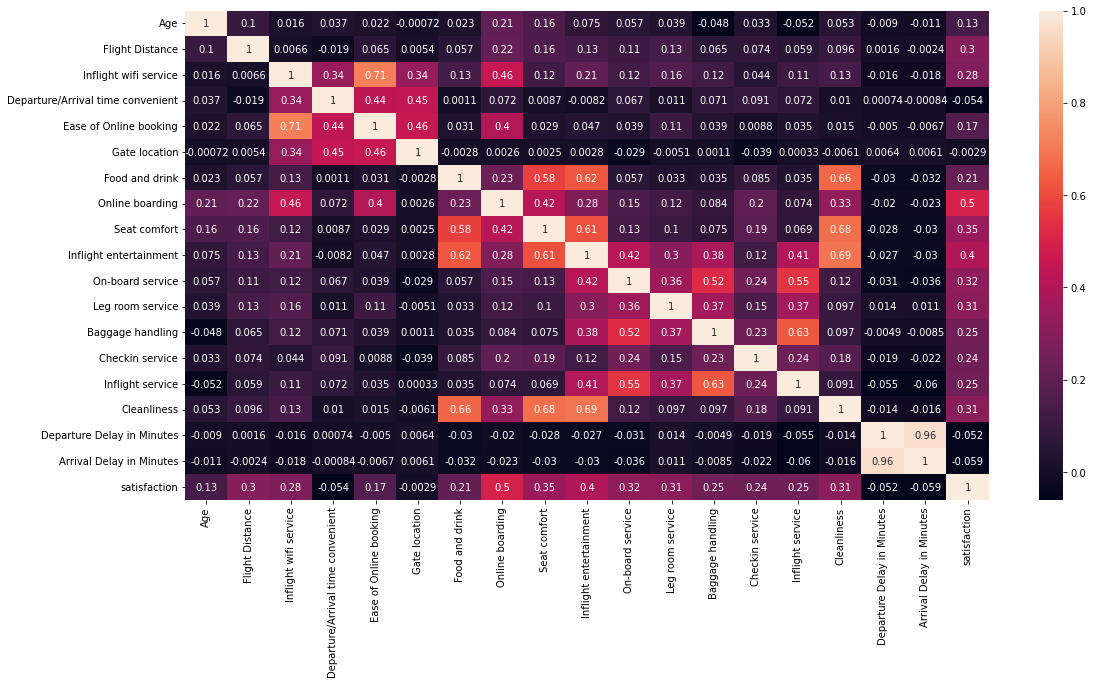

In [45]:
#The majority of personal travel passengers are not satisfied
#Now let's visualize our correlation matrix using a heatmap. 
#then print out the highest correlated variables to our y-variable (satisfaction).

plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), annot=True)

In [46]:
df.corr().abs()['satisfaction'].sort_values(ascending = False)

satisfaction                         1.000000
Online boarding                      0.501616
Inflight entertainment               0.398339
Seat comfort                         0.348558
On-board service                     0.322336
Leg room service                     0.312553
Cleanliness                          0.306871
Flight Distance                      0.298196
Inflight wifi service                0.283293
Baggage handling                     0.248663
Inflight service                     0.245028
Checkin service                      0.237123
Food and drink                       0.211145
Ease of Online booking               0.168704
Age                                  0.133999
Arrival Delay in Minutes             0.058912
Departure/Arrival time convenient    0.054448
Departure Delay in Minutes           0.051604
Gate location                        0.002921
Name: satisfaction, dtype: float64

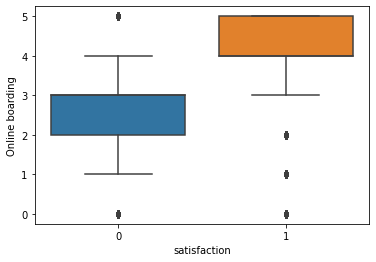

In [40]:
# We can see that the variables that are the most highly correlated to our y-variable are:
# Class and Online boarding with (50%) correlation.
sns.boxplot(x='satisfaction', y='Online boarding', data=df)

# 0 = neutral or dissatisfied
# 1 = satisfied

In [ ]:
# For some people, even though they had a good online boarding experience, they weren't satisified.
# Let's start the prediction process
#Let's start the prediction process
#X = df.drop('satisfaction_satisfied', axis=1)
#y = df['satisfaction_satisfied']

In [47]:
# we will divide our data to training and testing data set 

from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(103587, 27)
(25897, 27)


In [3]:
# we will import some libraries that help us to do the ML models

# command line install, uncomment line below
#!conda install -y -c conda-forge xgboost

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
pip install xgboost

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
score1=metrics.accuracy_score(y_test, y_pred1)
print(score1)

0.7485036876858323


In [49]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred2 = decisiontree.predict(X_test)
score2=metrics.accuracy_score(y_test, y_pred2)
print(score2)

0.9475228790979651


In [50]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred3 = randomforest.predict(X_test)
score3=metrics.accuracy_score(y_test, y_pred3)
print(score3)

0.9633934432559756


In [ ]:
# let's print out all the model's accurcy
print('Accuracy:-\n')
print("KNN: {} \nDecision Tree: {} \nRandom Forest: {}\nXGBoost: {}\n".format(score1,score2,score3,score4))

Accuracy:-



NameError: name 'score4' is not defined

In [ ]:
#It looks like our .... model performs the best out of all our models -- with an +..% score!
#In general also the Random Forest do better on this dataset.

#Also there are many plot and relations we can investigate them and many method to calculate the scores such as F1-score, Precision and Recall. But due to time constraints, we were able to find the accuracy only.We will work to complate this project to enhance the results and the findings.